# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 11.11.2021

Мягий дедлайн: 23:59MSK 23.11.2021

Жестокий дедлайн: 23:59MSK 26.11.2021

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/31332/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [174]:
def find_best_split2(feature_vector, target_vector):
    feature_vector_sorted = np.sort(feature_vector)
    target_vector_sorted = target_vector[np.argsort(feature_vector)]
    unique_feature, index, count = np.unique(feature_vector_sorted, return_counts=True,  return_index=True)
    thresholds = np.vstack([unique_feature[1:], unique_feature[:-1]]).mean(axis=0)
    
    
    count_1 = np.cumsum(target_vector_sorted)[:-1]
    count_0 = np.arange(1, target_vector_sorted.shape[0]) - count_1
    p_1 = count_1 / np.arange(1, target_vector_sorted.shape[0])
    p_0 = count_0 / np.arange(1, target_vector_sorted.shape[0])
    H_Rl = 1 - np.power(p_1, 2) - np.power(p_0, 2)
    
    
    count_1 = np.cumsum(target_vector_sorted[::-1])[:-1][::-1]
    count_0 = np.arange(1, target_vector_sorted.shape[0])[::-1] - count_1
    p_1 = (count_1 / np.arange(1, target_vector_sorted.shape[0])[::-1])
    p_0 = (count_0 / np.arange(1, target_vector_sorted.shape[0])[::-1])
    H_Rr = 1 - np.power(p_1, 2) - np.power(p_0, 2)
    
    
    Rl = np.arange(1, target_vector_sorted.shape[0])
    R = feature_vector.shape[0]

    Rr = Rl[::-1]
    ginis = ((-(Rl / R) * H_Rl) - ((Rr / R) * H_Rr))[(index - 1 + count)[:-1]]

    thresholds_best = thresholds[ginis.argmax()]
    gini_best = ginis.max()
    return thresholds, ginis, thresholds_best, gini_best

In [170]:
def find_best_split(feature_vector, target_vector):    
    zip_vector = sorted(list(zip(feature_vector, target_vector)), key=lambda x: x[0])
    feat, target = zip(*zip_vector) 
    
    Rl = np.arange(1, len(target), 1)
    R = feature_vector.shape[0]
        
    sl_1 = np.cumsum(target[:-1])
    pl_1 = sl_1 / Rl

    sl_0 = Rl - sl_1
    pl_0 = sl_0 / Rl
    
    sr_1 = np.cumsum(target[:0:-1])
    pr_1 = (sr_1 / Rl)[::-1]

    sr_0 = Rl - sr_1
    pr_0 = (sr_0 / Rl)[::-1]
    
    H_Rl = 1 - pl_1 ** 2 - pl_0 ** 2                 
    H_Rr = 1 - pr_1 ** 2 - pr_0 ** 2
    
    unique_feat, index, counts = np.unique(feat, return_index=True, return_counts=True)
    ginis = (- (Rl / R) * H_Rl - (Rl[::-1] / R) * H_Rr)[(counts + index - 1)[:-1]]
    gini_best = np.max(ginis)
    
    thresholds = (unique_feat[1:] + unique_feat[:-1]) / 2
    threshold_best = thresholds[np.argmax(ginis)]
    return thresholds, ginis, threshold_best, gini_best

In [175]:
a = np.array([4, 4, 2, 4, 0, 0, 2, 3, 0, 2])
b = np.array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1])

c = find_best_split(np.array(a), np.array(b))
d = find_best_split2(np.array(a), np.array(b))
print(c[2], d[2])
print(np.argmax(c[1]), np.argmax(d[1]))

2.5 2.5
1 1


In [176]:
for _ in range(100):
    a = np.random.randint(5, size=10)
    b = np.random.randint(2, size=10)
    assert all(find_best_split2(np.array(a), np.array(b))[0] == find_best_split(a, np.array(b))[0]), [a, b]
    assert all(find_best_split2(np.array(a), np.array(b))[1] == find_best_split(a, np.array(b))[1]), [a, b]
    assert find_best_split2(np.array(a), np.array(b))[2] == find_best_split(a, np.array(b))[2], [a, b]
    assert find_best_split2(np.array(a), np.array(b))[3] == find_best_split(a, np.array(b))[3], [a, b]

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [23]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [24]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

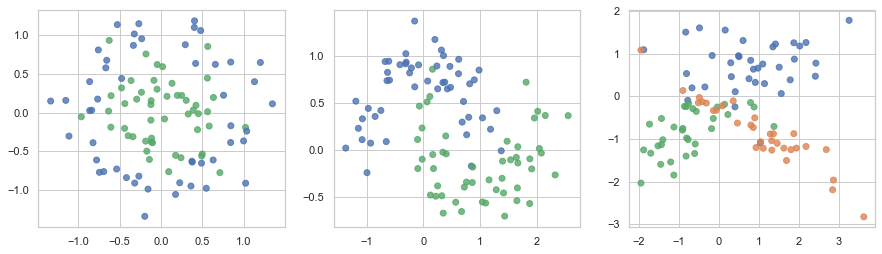

In [25]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. **Вопрос:** Сильно ли деревья переобучились? 

**Ответ:** Деревья переобучились достаточно сильно. Свидетельством этого является единчиная accuracy на обучающей выборке, что особенно контрастирует с диапазоном результатов тестовых выборок: от 0.65 до 0.95. Также можно отметить сами получившиеся графики, где разлеление классов однозначно указывает на подстраивание алгоритма.

In [26]:
def plot_surface(clf, X, y, **kwargs):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    if kwargs.get('axis', False):
        ax = kwargs.get("axis")
        cs = ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)
    else:
        cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                    edgecolors=np.array(palette)[y], linewidths=2)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

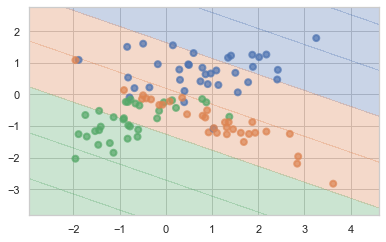

In [27]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Accuracy of model on the train dataset № 1: 1.0
Accuracy of model on the test dataset № 1: 0.65

Accuracy of model on the train dataset № 2: 1.0
Accuracy of model on the test dataset № 2: 0.95

Accuracy of model on the train dataset № 3: 1.0
Accuracy of model on the test dataset № 3: 0.7



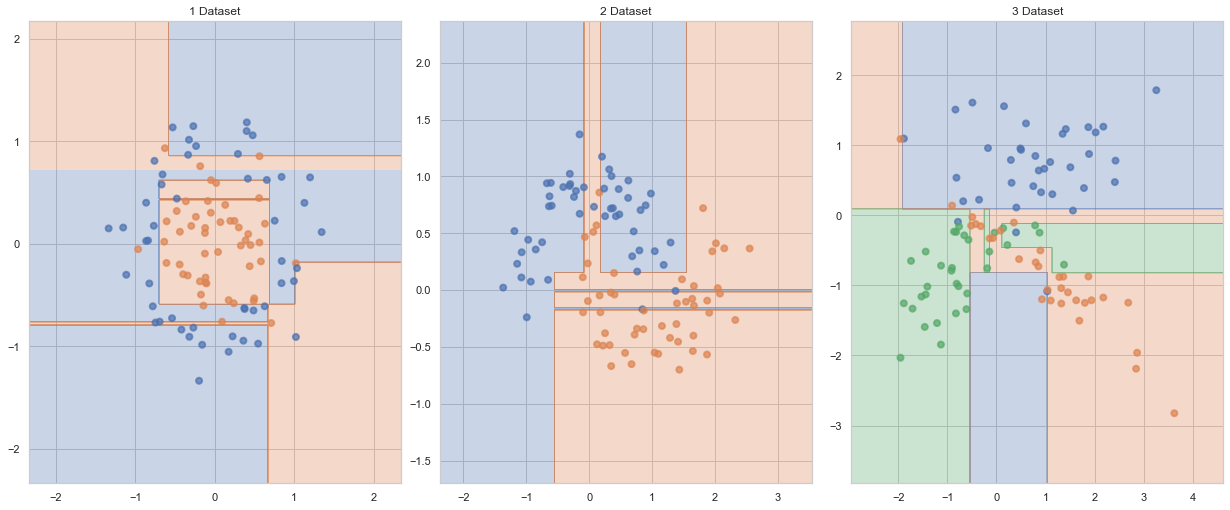

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))
plt.rcParams['font.size'] = 16
for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    plot_surface(clf, X, y, axis=ax[i])
    ax[i].set(title='{} Dataset'.format(i+1))
    print('Accuracy of model on the train dataset № {}:'.format(i+1), accuracy_score(clf.predict(X_train), y_train))
    print('Accuracy of model on the test dataset № {}:'.format(i+1), accuracy_score(clf.predict(X_test), y_test))
    print()

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность.**Вопрос:** Почему так происходит, одинаково ли изменение для разных датасетов?

**Ответ:**

1) При уменьшении значения минимального числа объектов в листе `min_samples_leaf`ожидаемо наблюдается постепенное движение алгоритма в сторону переобучения. Исследуя графики в одном столбце по три строчки ярко видна динамика, как разделение становится все более комплексным. Конечно, данный тренд схож для всех трех датасетов.

2) Тождественная ситуация с параметром `max_depth`. Увеличения разрешенной глубины нашего дерева позволяет, как и в предыдущем пункте, создать больше листьев, а значит и становистя более гибким относительно обучающей выборки. В то же время, выставляя данный параметр как `None` не приводит к каким-либо видимым изменениям - график схож с ситуацией для значения 4. Тем не менее, обращаясь к значениям accuracy можно увидеть внеочередное увеличение результатов для обучающнй выборки (в конце устремляются к 1) и падение для тестовой.

3) Также стоит подчеркнуть, что комбинация переобучения по первым двум пунктам приводит к самым неэффективным моделям.

4) Тренд наблюдается при плавном переходе вдоль строк графиков. Плавное падение тестовых значений и обратный рост обучающих. Подобное поведение одинаково для всех трех датасетов, разница заключается в степени изменения показателя accuracy.

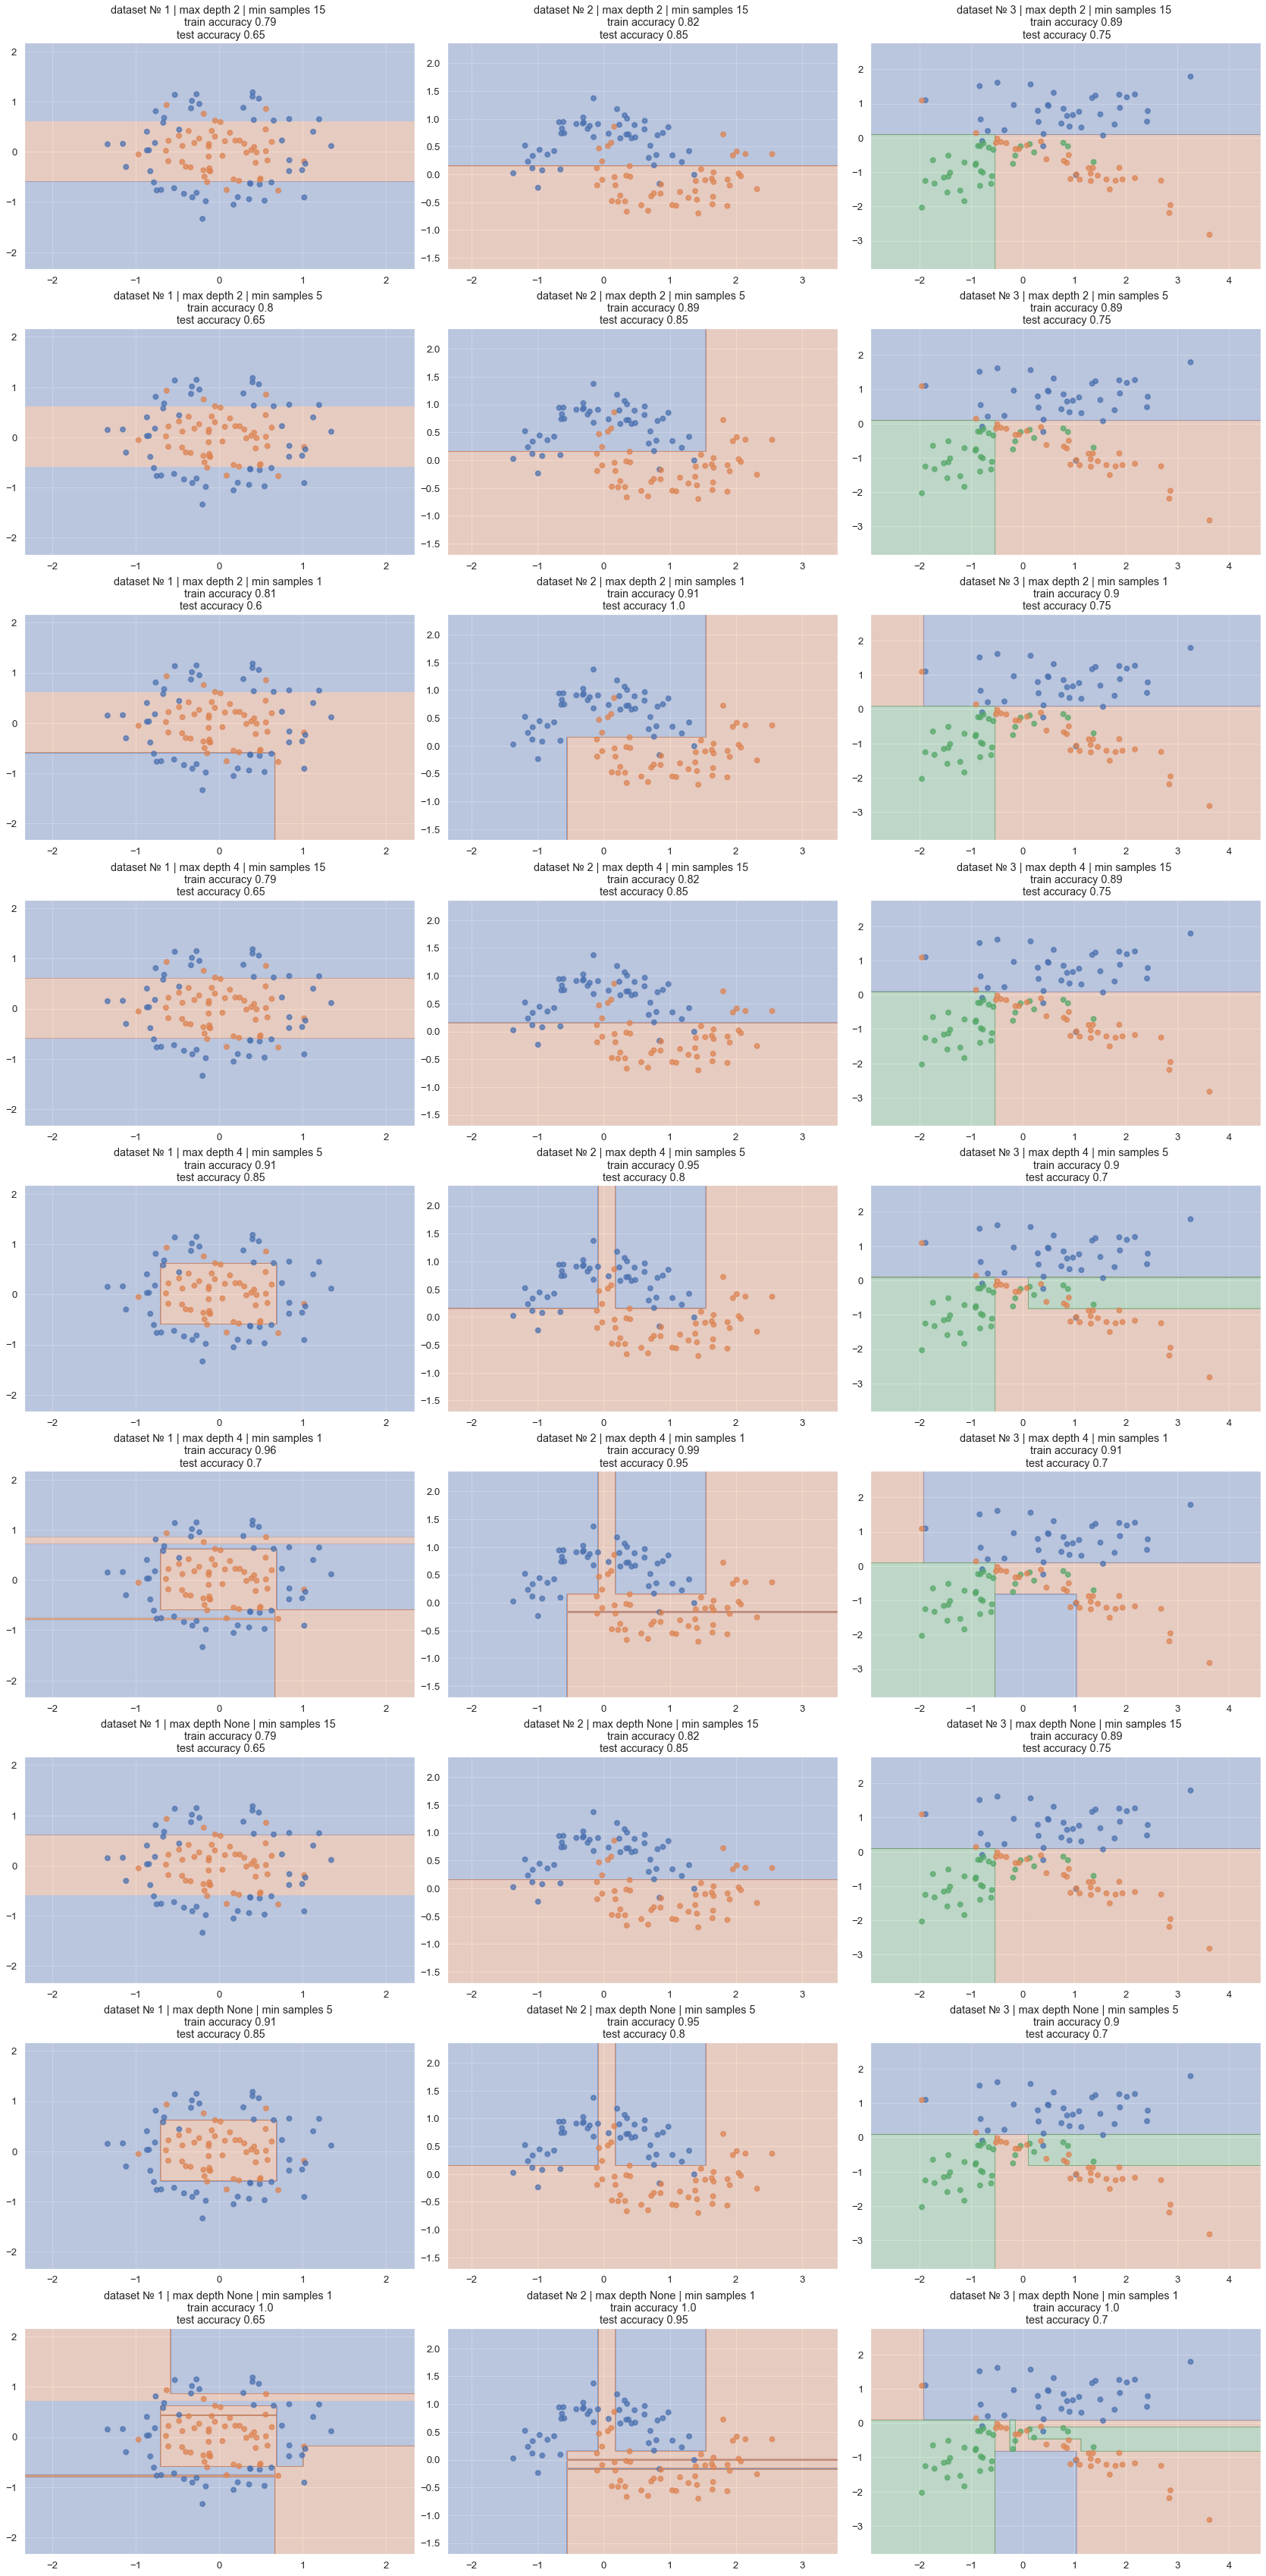

In [29]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots(nrows=9, ncols=3, figsize=(24, 48))
for num, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    for i, max_depth in enumerate([2, 4, None]):
        for j, min_samples_leaf in enumerate([15, 5, 1]):
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
            clf.fit(X_train, y_train)
            plot_surface(clf, X, y, axis=ax[(i * 3) + j][num])
            ax[(i * 3) + j][num].set(title = """dataset № {} | max depth {} | min samples {} 
        train accuracy {} \n test accuracy {}""".format(num + 1, max_depth, min_samples_leaf, 
                                                               round(accuracy_score(clf.predict(X_train), y_train), 2),
                                                               round(accuracy_score(clf.predict(X_test), y_test), 2)))

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

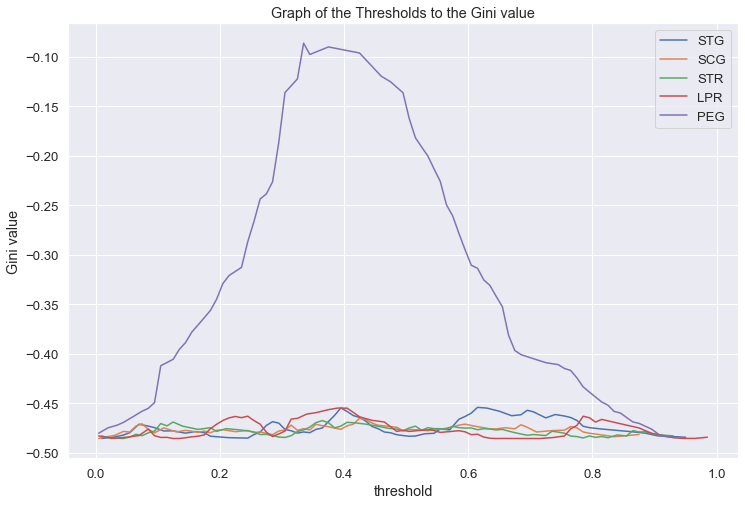

In [30]:
from hw5code import find_best_split, DecisionTree

student = pd.read_csv('students.csv')
fig, ax = plt.subplots(figsize=(12, 8))
for feature in student.columns[:-1]:
    thresholds, ginis, threshold_best, gini_best = find_best_split(student[feature], student.iloc[:, -1])
    ax.plot(thresholds, ginis, label=feature)
ax.set(title='Graph of the Thresholds to the Gini value', xlabel='threshold', ylabel='Gini value')
ax.legend()
plt.show()

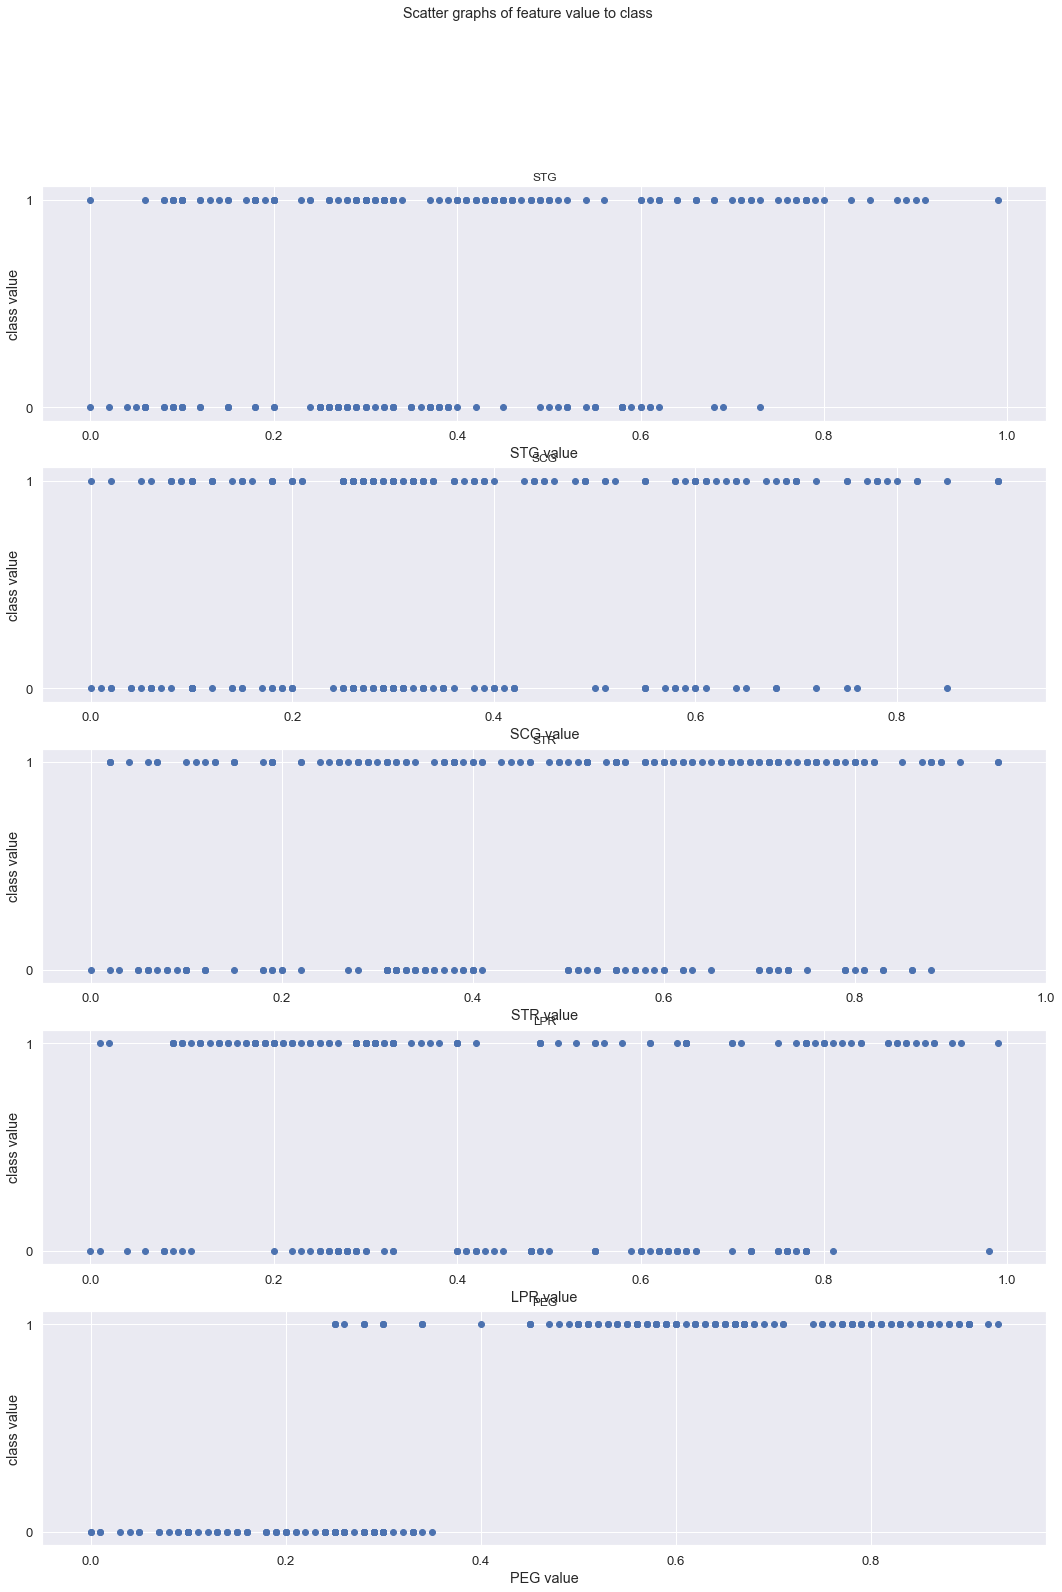

In [31]:
fig, ax = plt.subplots(nrows=5, figsize=(18, 25))
sns.set(font_scale=1)
fig.suptitle('Scatter graphs of feature value to class')
for i, fear in enumerate(student.columns[:-1]):
    ax[i].scatter(student[fear], student.iloc[:, -1])
    ax[i].set(title=fear, xlabel='{} value'.format(fear), ylabel='class value')
    ax[i].yaxis.set_ticks([0, 1])
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**  

1) Исходя из кривой критерия Джини можно увидеть, что оптимальным признаком для деления выборки является PEG. У него есть ярко выраженные интервалы монотонного поведения, точка максимум, в отличии от остальных признаков. Их поведение непостоянно, наблюдаются частые колебания без ярко выраженных глобальных экстремумов.

2) Результат полностью согласуется с полученным scatter-графиков. Четко видно, что для хорошего признака объекты в зависимости от его значения могут быть высоко эффективно разделены на классы. В этом отличие от плохих признаков, где множество целевых значений практически не коррелирует, отрезки пересекаются. 

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [32]:
from sklearn import preprocessing


def saying_too_late_about_func(X):
    le = preprocessing.LabelEncoder()
    for feat in X.columns:
        X[feat] = le.fit_transform(X[feat])
    return X

In [33]:
room_mush = pd.read_csv("ag_lep.data")
X = room_mush.drop(room_mush.columns[0], axis=1)
X = saying_too_late_about_func(X)

y = room_mush[room_mush.columns[0]] == 'p'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

DT = DecisionTree(X.shape[1] * ['categorical'])
DT.fit(np.array(X_train), np.array(y_train))
y_pred = DT.predict(np.array(X_test))
print('Accuracy value for self-made Decision Tree is', accuracy_score(y_pred, y_test))

Accuracy value for self-made Decision Tree is 1.0


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [34]:
ticy_taca = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data',
                        sep=',', header=None)
cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',  sep=',', header=None)
nurse = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data',
                    sep=',', header=None)

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def just_in_time(libr, feat, cv_val, ohe=False):
    result = {}
    for label in libr.keys():
        if ohe:
            X = preprocessing.OneHotEncoder(sparse=False).fit_transform(libr[label][0])
        else:
            X = libr[label][0]
        DT = DecisionTree(X.shape[1] * [feat])
        y = libr[label][1]
        result[label] = (cross_val_score(DT, np.array(X), np.array(y), cv=cv_val, 
                             scoring=make_scorer(accuracy_score))).mean()  
    return result

In [36]:
libr = {'mushroom': (saying_too_late_about_func(room_mush.drop(room_mush.columns[0], axis=1)),
                     room_mush[room_mush.columns[0]].map({'p': 1, 'e':0})),
       'tic-tac-toe': (saying_too_late_about_func(ticy_taca.drop(ticy_taca.columns[-1], axis=1)),
                       ticy_taca[ticy_taca.columns[-1]].map({'positive': 1, 'negative':0})),
       'cars': (saying_too_late_about_func(cars.drop(cars.columns[-1], axis=1)),
                cars[cars.columns[-1]].isin(['good', 'vgood'])),
       'nursery': (saying_too_late_about_func(nurse.drop(nurse.columns[-1], axis=1)), 
                   nurse[nurse.columns[-1]].isin(['very_recom', 'priority', 'spec_prior']))}

In [44]:
experiments = [[libr, 'real', 10], [libr, 'categorical', 10], [libr, 'categorical', 10, True]] 

In [52]:
gross = pd.DataFrame()


for i, args in enumerate(experiments):
    print('Experiment', i + 1)
    back = just_in_time(*args)
    gross = gross.append(pd.DataFrame([back]))
    display(back)

Experiment 1


{'mushroom': 0.9992610837438424,
 'tic-tac-toe': 0.4706907894736842,
 'cars': 0.9397398843930637,
 'nursery': 0.9996913580246914}

Experiment 2


{'mushroom': 1.0,
 'tic-tac-toe': 0.5414583333333333,
 'cars': 0.9675460411345611,
 'nursery': 0.9998456790123458}

Experiment 3


{'mushroom': 0.9996305418719211,
 'tic-tac-toe': 0.5446162280701754,
 'cars': 0.919495227853206,
 'nursery': 0.999537037037037}

In [78]:
print('DecisionTree from sklearn')
embed = []
for keys, values in libr.items():
    DT = DecisionTreeClassifier(random_state=42)
    result = (cross_val_score(DT, np.array(values[0]), np.array(values[1]), cv=10, 
                             scoring=make_scorer(accuracy_score))).mean()
    print(keys, result)
    embed.append(result)
tmp = pd.DataFrame(columns=['mushroom', 'tic-tac-toe', 'cars', 'nursery'])
tmp.loc[0] = embed
df = pd.concat([gross.reset_index(drop=True), tmp], axis=0).reset_index(drop=True)

DecisionTree from sklearn
mushroom 0.9619844400414447
tic-tac-toe 0.7716776315789474
cars 0.9427073531388628
nursery 0.9996913580246914


In [79]:
df.rename(index = {0:'Real', 1:'Categorical', 2:'Ohe', 3:'sklearn'})

,mushroom,tic-tac-toe,cars,nursery
Real,0.999261,0.470691,0.939740,0.999691
Categorical,1.000000,0.541458,0.967546,0.999846
Ohe,0.999631,0.544616,0.919495,0.999537
sklearn,0.961984,0.771678,0.942707,0.999691


In [82]:
print('Cars target distribution:', libr['cars'][1].mean())

Cars target distribution: 0.0775462962962963


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** 

1) Во-первых, очевидно выпадание из общего тренда на высокую accuracy одного из датасетов, а точнее, tic_tac_toe. 

2) Нельзя не отметить общие закономерности среди экспериментов. Наиболее эффективным оказывается вариант №2 с категориальными признаками. В то же время, явно ощущался контраст по времени работы алгоритмов при введении OHE-кодирования. Добавим, что, хоть и показывая чуть меньшую accuracy, модель с вещественными признаками тоже предоставила неплохие результаты с небольшим отклонением от фаворита. Хотя конечно, возникают вопросы о смысле LabelEncoder, ведь изначально не предполагалось рассматривать признаки как вещественные (вряд ли крестик сильно лучше нолика). Также вполне ожидаемо, что в среднем встроенный алгоритм оказался более эффективным и по времени работы, и по accuracy.

3) Имеется интересное замечание по датасету машин. В нем ужасающие распределение таргета. Таким образом, если бы не пытались тут умными вещами заниматься, а просто поставили константное предсказание, все тоже было бы круто.

4) Вернемся к первому пункту: почему крестики-нолики выпадают из общего ряда? Во-первых, на приведенном далее графике видно, что массив данных достаточно специфичен: большая часть кейсов позволяет угадать результат обычным суммированием наших признаков. Во-вторых, пропорция таргетов теоретически позволяет представить ситуацию, когда в обучении отсутсвуют представители одного из классов. То есть мы потенциально получаем высокие значения стандартного отклонения на разных вариантах cv split.

11    444
12    168
9     148
8     120
14     78
Name: 0, dtype: int64

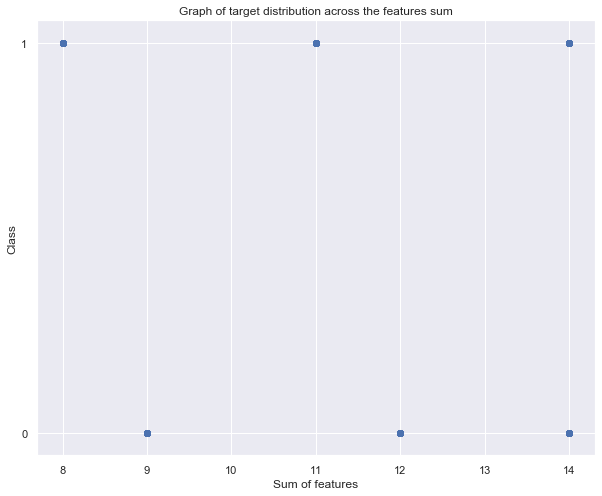

In [259]:
a = saying_too_late_about_func(ticy_taca.drop(ticy_taca.columns[-1], axis=1)).sum(axis=1)
y = ticy_taca[ticy_taca.columns[-1]].map({'positive': 1, 'negative':0})
f = pd.concat([a, y], axis=1)
plt.figure(figsize=(10, 8))
plt.gca().yaxis.set_ticks([0, 1])
plt.scatter(f[0], f[9])
plt.title('Graph of target distribution across the features sum')
plt.xlabel('Sum of features')
plt.ylabel('Class')
f[0].value_counts()

In [251]:
sub_libr = {'tic-tac-toe': (saying_too_late_about_func(ticy_taca.drop(ticy_taca.columns[-1], axis=1)),
                           ticy_taca[ticy_taca.columns[-1]].map({'positive': 1, 'negative':0}))}
experiments_1 = [[sub_libr, 'real', skf], [sub_libr, 'categorical', skf], [sub_libr, 'categorical', skf, True]] 
experiments_2 = [[sub_libr, 'real', ps], [sub_libr, 'categorical', ps], [sub_libr, 'categorical', ps, True]] 

In [253]:
from sklearn.model_selection import PredefinedSplit


encoded = saying_too_late_about_func(ticy_taca.drop(ticy_taca.columns[-1], axis=1))
encoded['ps'] = encoded.index % 10
ps = PredefinedSplit(encoded['ps'])
print('Experiments for tic-tac-toe with PredefinedSplit')
for i, args in enumerate(experiments_2):
    print('Experiment', i + 1)
    back = just_in_time(*args)
    display(back)

Experiment 1


{'tic-tac-toe': 0.8768201754385965}

Experiment 2


{'tic-tac-toe': 0.9488596491228071}

Experiment 3


{'tic-tac-toe': 0.9488596491228071}

In [255]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True)
print('Experiments for tic-tac-toe with StratifiedKFold')
for i, args in enumerate(experiments_1):
    print('Experiment', i + 1)
    back = just_in_time(*args)
    display(back)

Experiment 1


{'tic-tac-toe': 0.9008771929824562}

Experiment 2


{'tic-tac-toe': 0.9519956140350876}

Experiment 3


{'tic-tac-toe': 0.943640350877193}

In [84]:
from sklearn.model_selection import PredefinedSplit

encoded = saying_too_late_about_func(ticy_taca.drop(ticy_taca.columns[-1], axis=1))
y = ticy_taca[ticy_taca.columns[-1]].map({'positive': 1, 'negative':0})
encoded = pd.concat([encoded, y], axis=1)
encoded['ps'] = encoded.index % 10


ps = PredefinedSplit(encoded['ps'])
DT = DecisionTree(encoded.shape[1] * ['categorical'])
result = (cross_val_score(DT, np.array(encoded), np.array(y), cv=ps, 
                             scoring=make_scorer(accuracy_score))).mean()
result

1.0

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания: